# import modules

In [1]:
import numpy as np
import os
from numpy import linalg as LA
import librosa
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras import backend as K
import pandas as pd
import cv2
from PIL import Image
import time
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
#from pylab import *
import math

/Users/e175727/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Import and save row datas

In [2]:
data_arr = []
levels=os.listdir("/Users/e175727/ie-exp3/Presentation/EXP_DSP/BillData")
for a in levels:
    try:
        if not a.startswith('.'):
            files = os.listdir("/Users/e175727/ie-exp3/Presentation/EXP_DSP/BillData/"+a)
            files_arr = []
            for b in files:
                try:
                    if not b.startswith('.'):
                        num_arr = []
                        path_to_file = os.path.join("/Users/e175727/ie-exp3/Presentation/EXP_DSP/BillData/"+a, b)
                        fd = open(path_to_file , 'r')
                        while True:
                            string = fd.readline()
                            if not string: break
                            num_arr.append(float(string[:-1]))
                        files_arr.append(num_arr)
                        fd.close()
                except AttributeError:
                    print("")
            data_arr.append(files_arr)
    except AttributeError:
        print("")
        
#data_arr[level_num][file_num][numbers]
#level_num : 0~4(5 classes)
#file_num : 0~79(20*4 files)
#numbers : 0~8799(8800 amplitudes)

In [3]:
Datas=np.array(data_arr)

In [4]:
np.save("Datas",Datas)

## Load row datas

In [2]:
Datas=np.load("Datas.npy")

# AMP by time

In [19]:
# Diff_t=[]
# la_t = []
# degree = []
# for for_1 in range(0,len(Datas)): 
#     for for_2 in range(0,len(Datas[0])):   
#         tmp = np.zeros(31)
#         _X_ = Datas[for_1][for_2][2:]-Datas[for_1][for_2][1:8799]
#         _Y_ = Datas[for_1][for_2][1:8799]-Datas[for_1][for_2][:8798]
        
#         _R_ = np.sqrt(_X_*_X_ + _Y_*_Y_)
#         for a,x,y in zip(_R_,_X_,_Y_):
#             radian = math.atan2(x, y)
#             deg = math.degrees(radian)
#             if 0<=a<=0.01and 0<deg<=25:
#                 tmp[int(a/0.005)] = tmp[int(a/0.005)] + 1
#             elif 0<=a<=0.01 and 25<deg<=50:
#                 tmp[int(a/0.005)+3] = tmp[int(a/0.005)+3] + 1
#             elif 0<=a<=0.01 and 50<deg<=75:
#                 tmp[int(a/0.005)+6] = tmp[int(a/0.005)+6] + 1
#             elif 0<=a<=0.01 and 75<deg<=100:
#                 tmp[int(a/0.005)+9] = tmp[int(a/0.005)+9] + 1
#             elif 0<=a<=0.01 and 100<deg<=180:
#                 tmp[int(a/0.005)+12] = tmp[int(a/0.005)+12] + 1
#             elif 0<=a<=0.01 and -180<deg<=-100:
#                 tmp[int(a/0.005)+15] = tmp[int(a/0.005)+15] + 1
#             elif 0<=a<=0.01 and -100<deg<=-75:
#                 tmp[int(a/0.005)+18] = tmp[int(a/0.005)+18] + 1
#             elif 0<=a<=0.01 and -75<deg<=-50:
#                 tmp[int(a/0.005)+21] = tmp[int(a/0.005)+21] + 1
#             elif 0<=a<=0.01 and -50<deg<=-25:
#                 tmp[int(a/0.005)+24] = tmp[int(a/0.005)+24] + 1
#             elif 0<=a<=0.01 and -25<deg<=0:
#                 tmp[int(a/0.005)+27] = tmp[int(a/0.005)+27] + 1
#             elif a>0.01:
#                 tmp[30] = tmp[30] + 1
# #         Diff_t.append(tmp)
# #         la_t.append(for_1)
#         Diff_t.append(tmp)
#         if for_1==0 or for_1==1:
#             la_t.append("NEW")
#         else:
#             la_t.append("OLD")

In [14]:
Diff_t=[]
la_t = []
degree = []
Tmp = []
for for_1 in range(0,len(Datas)): 
    for for_2 in range(0,len(Datas[0])):   
        tmp = np.zeros(11)
        _X_ = Datas[for_1][for_2][2:]-Datas[for_1][for_2][1:8799]
        _Y_ = Datas[for_1][for_2][1:8799]-Datas[for_1][for_2][:8798]
        _Z_ = Datas[for_1][for_2][2:]-Datas[for_1][for_2][:8798]
        _R_ = np.sqrt(_X_*_X_ + _Y_*_Y_ + _Z_*_Z_)
        for a in _R_:
            if 0<=a<=0.09:
                tmp[int(a/0.01)] = tmp[int(a/0.01)] + 1
            else:
                tmp[10] = tmp[10] + 1
        Tmp.append(tmp[10])
        Diff_t.append(tmp)
        la_t.append(for_1)
#         Diff_t.append(tmp)
#         if for_1==0 or for_1==1:
#             la_t.append("NEW")
#         else:
#             la_t.append("OLD")

In [69]:
Diff_t=[]
la_t = []
degree = []
R = []
for for_1 in range(0,len(Datas)): 
    for for_2 in range(0,len(Datas[0])):   
        tmp = np.zeros(5)
        _X_ = Datas[for_1][for_2][2:]-Datas[for_1][for_2][1:8799]
        _Y_ = Datas[for_1][for_2][1:8799]-Datas[for_1][for_2][:8798]
        _Z_ = Datas[for_1][for_2][2:]-Datas[for_1][for_2][:8798]
        _R_ = np.sqrt(_X_*_X_ + _Y_*_Y_ + _Z_*_Z_)
        for a,x,y,z in zip(_R_,_X_,_Y_,_Z_):
            radian1 = math.atan2(x, y)
            deg1 = math.degrees(radian1)
            radian2 = math.atan2(a, z)
            deg2 = math.degrees(radian2)
            if 0<=deg1<90 and 0<=deg2<90:
                tmp[0] = tmp[0] + 1
            elif 90<=deg1<180 and 90<=deg2<180:
                tmp[1] = tmp[1] + 1
            elif -180<=deg1<-90 and -180<=deg2<-90:
                tmp[2] = tmp[2] + 1
            elif -90<=deg1<0 and -90<=deg2<0:
                tmp[3] = tmp[3] + 1
            else:
                tmp[4] = tmp[4] + 1
                
        Diff_t.append(tmp)
        la_t.append(for_1)
#         Diff_t.append(tmp)
#         if for_1==0 or for_1==1:
#             la_t.append("NEW")
#         else:
#             la_t.append("OLD")

In [71]:
print(Tmp)

[113.0, 174.0, 170.0, 244.0, 118.0, 244.0, 90.0, 266.0, 405.0, 221.0, 139.0, 160.0, 187.0, 116.0, 194.0, 218.0, 302.0, 122.0, 316.0, 195.0, 222.0, 191.0, 152.0, 277.0, 99.0, 207.0, 155.0, 119.0, 187.0, 134.0, 158.0, 280.0, 144.0, 206.0, 394.0, 244.0, 154.0, 153.0, 234.0, 174.0, 212.0, 194.0, 127.0, 157.0, 139.0, 134.0, 279.0, 216.0, 130.0, 160.0, 157.0, 205.0, 173.0, 104.0, 202.0, 164.0, 117.0, 155.0, 94.0, 189.0, 229.0, 294.0, 26.0, 141.0, 140.0, 120.0, 246.0, 173.0, 306.0, 17.0, 167.0, 159.0, 223.0, 173.0, 217.0, 176.0, 101.0, 169.0, 202.0, 260.0, 198.0, 129.0, 224.0, 148.0, 247.0, 152.0, 209.0, 153.0, 309.0, 177.0, 156.0, 219.0, 225.0, 238.0, 239.0, 160.0, 155.0, 143.0, 217.0, 196.0, 171.0, 298.0, 299.0, 135.0, 175.0, 171.0, 141.0, 158.0, 247.0, 140.0, 290.0, 292.0, 271.0, 134.0, 160.0, 171.0, 179.0, 170.0, 178.0, 204.0, 130.0, 164.0, 421.0, 171.0, 251.0, 348.0, 129.0, 154.0, 257.0, 305.0, 255.0, 139.0, 180.0, 192.0, 246.0, 179.0, 173.0, 189.0, 199.0, 202.0, 163.0, 167.0, 213.0, 153

In [15]:
Diff_t = np.array(Diff_t)
la_t = np.array(la_t)

# Classifiers

/Users/e175727/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/e175727/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/e175727/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:706: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/e175727/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:706: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/e175727/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:709: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s i

                      Classifier  Accuracy
0           KNeighborsClassifier    0.5125
0                            SVC    0.3425
0         DecisionTreeClassifier    0.4900
0         RandomForestClassifier    0.5200
0             AdaBoostClassifier    0.3550
0     GradientBoostingClassifier    0.5075
0                     GaussianNB    0.5250
0     LinearDiscriminantAnalysis    0.5725
0  QuadraticDiscriminantAnalysis    0.2000
0             LogisticRegression    0.5375


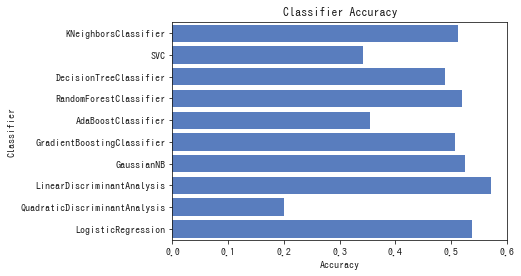

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression


#classifiers = [GradientBoostingClassifier()]
classifiers = [
    KNeighborsClassifier(2),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]
# classifiers = [
#     KNeighborsClassifier(1),
#     KNeighborsClassifier(2),
#     KNeighborsClassifier(3),
#     KNeighborsClassifier(4),
#     KNeighborsClassifier(5),
#     KNeighborsClassifier(6),
#     KNeighborsClassifier(7),
#     KNeighborsClassifier(8),
#     KNeighborsClassifier(9),
#     KNeighborsClassifier(10)]
#     SVC(probability=True),
#     DecisionTreeClassifier(),
#     RandomForestClassifier(),
#     AdaBoostClassifier(),
#     GradientBoostingClassifier(),
#     GaussianNB(),
#     LinearDiscriminantAnalysis(),
#     QuadraticDiscriminantAnalysis(),
#     LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log      = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = Diff_t
y = la_t

acc_dict = {}
# k = 1
# for train_index, test_index in sss.split(X, y):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

#     for clf in classifiers:
#         name = clf.__class__.__name__+str(k)
#         clf.fit(X_train, y_train)
#         train_predictions = clf.predict(X_test)
#         acc = accuracy_score(y_test, train_predictions)
#         if name in acc_dict:
#             acc_dict[name] += acc
#         else:
#             acc_dict[name] = acc
#     k = k + 1


for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc
    
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

print(log)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
# # plt.savefig('./MFCC.pdf', dpi=600)
plt.savefig('./Diff_5.png', dpi=600)
# plt.savefig('./Diff_2.png', dpi=600)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression


clf = GradientBoostingClassifier()

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = Diff_t
y = la_t

acc_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)

## Save Model

In [23]:
import pickle
with open('model.pickle', mode='wb') as fp:
    pickle.dump(clf, fp)